In [3]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from pylab import pcolor, colorbar, plot
from sklearn.preprocessing import MinMaxScaler

# Mapa Auto Organozável

In [4]:
# Importando bade de dados
base = pd.read_csv('../dados/credit.csv')

In [5]:
base.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

# Definindo variáveis X
X = base.iloc[:,0:4].values
y = base.iloc[:,4].values

In [7]:
# Normalizando valores de X
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [8]:
# Montando mapa
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
# Inicializando os pesos
som.random_weights_init(X)
# Treinamento
som.train_random(data = X, num_iteration = 100)

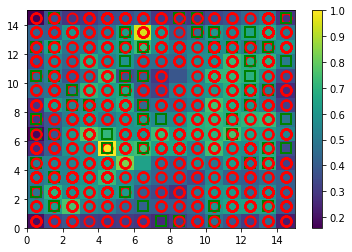

In [9]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
color = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)

In [10]:
# Dicionário resultante
mapeamento = som.win_map(X)

In [11]:
mapeamento

defaultdict(list,
            {(8, 9): [array([0.        , 0.9231759 , 0.89209175, 0.58883739]),
              array([0.04502251, 0.88555995, 0.94488088, 0.54622831]),
              array([0.06403202, 0.98320605, 0.76999752, 0.53494606]),
              array([0.07503752, 0.99168174, 0.86463389, 0.78947487]),
              array([0.11505753, 0.91492837, 0.74581546, 0.56108804]),
              array([0.14607304, 0.95582021, 0.76894078, 0.69788224])],
             (14,
              9): [array([5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01]), array([0.004002  , 0.41296337, 0.81542749, 0.3454094 ]), array([0.01150575, 0.15668515, 0.73863113, 0.36023692]), array([0.01850925, 0.24908572, 0.70061399, 0.31423393]), array([0.03101551, 0.23285166, 0.95757541, 0.37412386]), array([0.03451726, 0.26341331, 0.68626126, 0.33568686]), array([0.11805903, 0.29707836, 0.80384172, 0.43876045])],
             (4, 10): [array([0.0010005 , 0.74633429, 0.9811888 , 0.58262011]),
              

In [12]:
# Concatenando neurônios suspeitors
suspeitos = np.concatenate((mapeamento[(4, 5)], mapeamento[(6, 13)]), axis = 0)
# Desnomarlizando valores
suspeitos = normalizador.inverse_transform(suspeitos)

In [14]:
classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
       if base.iloc[i, 0] == int(round(suspeitos[j, 0])):
           classe.append(base.iloc[i, 4])

classe = np.asarray(classe)

In [15]:
# Concatenando suspeitos e classe
suspeitos_final = np.column_stack((suspeitos, classe))
# Ordenando 
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]